# Comparing models

##### The goals of this notebook:
- find the best polynomial degree for polynomial regression by testing empirically
- find the best number of layers and neurons per layer for Multi-layer Perceptron empirically
- compare the models found for polynomial regression and Multi-layer Perceprobn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [2]:
# Import data
df = pd.read_csv("cleaned_data.csv")

df

,Time,Cases,Close,next_Close
0,0,0,4352.100098,4315.410156
1,1,0,4324.770020,4322.740234
2,2,0,4344.259766,4300.080078
3,5,0,4246.680176,4294.100098
4,6,0,4323.930176,4359.759766
...,...,...,...,...
513,747,534790,5299.080078,5146.870117
514,748,542262,5287.819824,5209.259766
515,749,546782,5339.259766,5229.529785
516,750,559587,5297.140137,5151.890137


In [3]:
"""
Selecting the features(X) and the label(y)
    Label: "Close"
    Features: "Time", "Cases", "old_Close"
"""

y = df["next_Close"].to_numpy()
X = df[["Time","Cases","Close"]].to_numpy().reshape(-1,3)

#### Polynomial model
The next part consists of finding the best degree for polynomial model

In [4]:
# Split the dataset into a training set, a validation set and a test set
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42) #The answer

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Define a list of polynomial degrees
degrees = list(range(1,10))

# These variables are for storing the errors for each polynomial degree
poly_tr_errors = []
poly_val_errors = []

# Loop over the degrees
for i, degree in enumerate(degrees):
    lin_regr = LinearRegression()

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    poly_tr_errors.append(tr_error)
    poly_val_errors.append(val_error)

    



In [5]:
print("{:<10s}{:<20s}{:<20s}".format("Degree", "Training error", "Validation error"))
for i in range(len(degrees)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(degrees[i], poly_tr_errors[i], poly_val_errors[i]))

Degree    Training error      Validation error    
1         13855               17196               
2         11477               13491               
3         8647                9020                
4         7088                9284                
5         9986                10674               
6         14795               17118               
7         19977               20550               
8         120756              110069              
9         95611               466175              


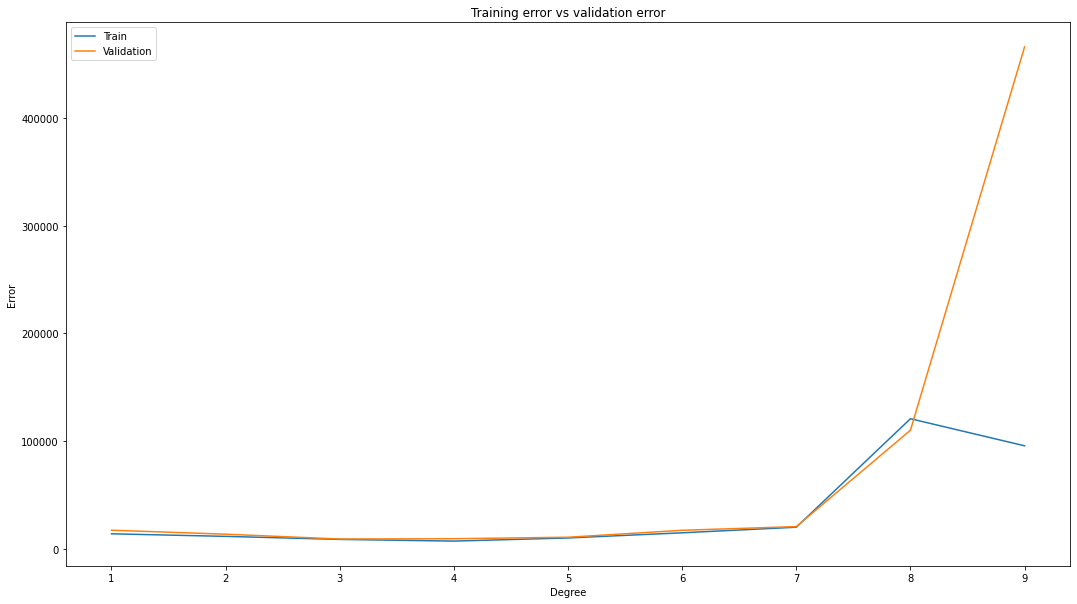

In [6]:
plt.figure(figsize=(18, 10))

plt.plot(degrees, poly_tr_errors, label = 'Train')
plt.plot(degrees, poly_val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

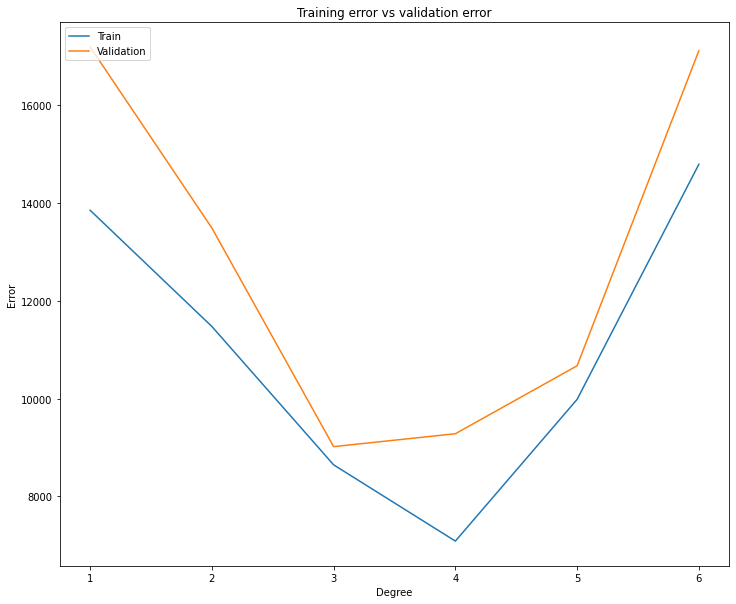

In [7]:
plt.figure(figsize=(12, 10))

n = 6
plt.plot(degrees[0:n], poly_tr_errors[0:n], label = 'Train')
plt.plot(degrees[0:n], poly_val_errors[0:n],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

#### Multi-layer Perceptron
The next part consists of finding the best number of layers and neuron per layer for Multi-layer Perceptron (MLP)


In [8]:
# define a list of values for the number of layers and neurons per layer
num_layers = [1,2,4,6,8,10,15,20,30]
num_neurons = list(range(5,16))

# These variables are for storing the errors for each polynomial degree
mlp_tr_errors = []
mlp_val_errors = []

for i, layer in enumerate(num_layers):
    tr_error_row = []
    val_error_row = []
    for neuron in num_neurons:
        hidden_layer_size = tuple([neuron]*layer)

        mlp_regr = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=hidden_layer_size)

        mlp_regr.fit(X_train, y_train)

        y_pred_train = mlp_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        y_pred_val = mlp_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)

        tr_error_row.append(tr_error)
        val_error_row.append(val_error)

    mlp_tr_errors.append(tr_error_row)
    mlp_val_errors.append(val_error_row)


C:\Users\sakuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sakuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\saku

In [9]:
for j in range (len(num_layers)):
    print("{:<10s}{:<20s}{:<20s}".format("Neurons", "Training error", "Validation error. Layers: " + str(num_layers[j]) ))
    for i in range(len(num_neurons)):
        print("{:<10d}{:<20.0f}{:<20.0f}".format(num_neurons[i], mlp_tr_errors[j][i], mlp_val_errors[j][i]))

Neurons   Training error      Validation error. Layers: 1
5         9293829             9057116             
6         162450              125340              
7         12061903            11269371            
8         22445               21504               
9         265166              385208              
10        15162               17378               
11        18444               19880               
12        27326               35607               
13        19933               20416               
14        16255               15721               
15        15342               18025               
Neurons   Training error      Validation error. Layers: 2
5         94998               57598               
6         16800               18371               
7         5559722             4163820             
8         15211583            14867204            
9         19371               39176               
10        16511               18267               
11        14737  

In [10]:
# Plotting with a good value for number of neurons
# 15 neurons seems to result in good error consistently

num_layers = list(range(1,30))
num_neurons = 15 # 15 neurons seems to result in good error consistently

mlp_tr_errors = []
mlp_val_errors = []

for num in num_layers:
    hidden_layer_size = tuple([num_neurons]*num)
    
    mlp_regr = MLPRegressor(random_state= 42, hidden_layer_sizes= hidden_layer_size, max_iter=50000)
    mlp_regr.fit(X_train, y_train)

    y_pred_train = mlp_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = mlp_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)


print("{:<10s}{:<20s}{:<20s}".format("Leyers", "Training error", "Validation error"))
for i in range(len(num_layers)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(num_layers[i], mlp_tr_errors[i], mlp_val_errors[i]))


Leyers    Training error      Validation error    
1         13822               17193               
2         14553               16332               
3         14801               16520               
4         15331               16641               
5         21752               23483               
6         14873               15687               
7         14514               15991               
8         13979               16360               
9         15482               18148               
10        16019               21542               
11        16251               18739               
12        16999               19001               
13        15045               16741               
14        17812               18239               
15        17640               18132               
16        16109               17309               
17        14506               16954               
18        14955               16405               
19        14564               1

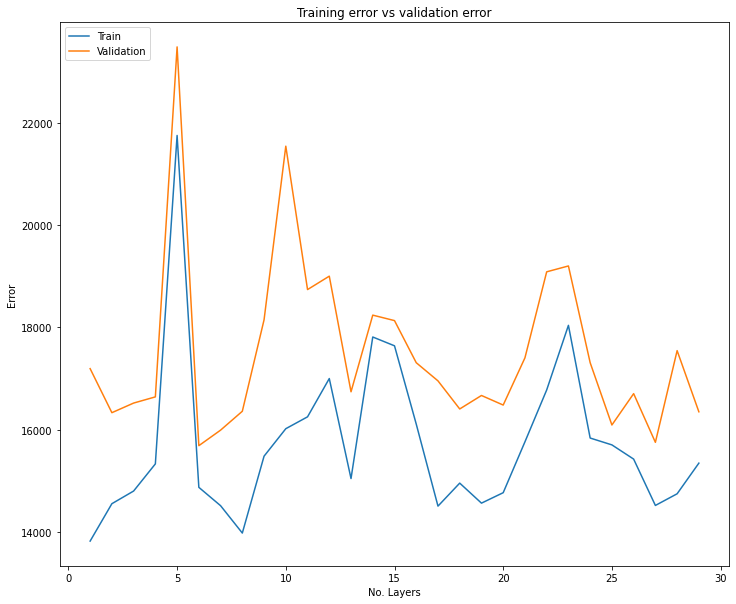

In [11]:
plt.figure(figsize=(12, 10))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('No. Layers')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

In [12]:
mlp_errors = {"Layers": num_layers, "mlp_tr_errors": mlp_tr_errors, "mlp_val_errors": mlp_val_errors}

pd.DataFrame(mlp_errors).round(0)

,Layers,mlp_tr_errors,mlp_val_errors
0,1,13822.0,17193.0
1,2,14553.0,16332.0
2,3,14801.0,16520.0
3,4,15331.0,16641.0
4,5,21752.0,23483.0
5,6,14873.0,15687.0
6,7,14514.0,15991.0
7,8,13979.0,16360.0
8,9,15482.0,18148.0
9,10,16019.0,21542.0


In [13]:
# Trying with varying number of neuron in each layer

layers=[(50,40,30,20,10),
        (42,32,16,8,4),
        (53,57,43,41,37,31,29,23,19,17,13,11),
        (60,30,15),
        (60,45,30,15),
        (30,15,15,10,10,5,5,5),
        (53,57,43,41,37,31,29,23,19,17,13,11,7,5,3,2),
        (30,15,15,15,5,5,5,5,5,5,5),
        (15,15,15,15,10,10,5,5),
        (15,15,5,5,5,5),
        (5,3,3,3),
        (5,3,3)
        ]

mlp_tr_errors = []
mlp_val_errors = []

for layer in layers:

    mlp_regr = MLPRegressor(random_state= 42, hidden_layer_sizes= layer, max_iter=10000)
    mlp_regr.fit(X_train, y_train)

    y_pred_train = mlp_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = mlp_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

mlp_errors = {"Layers": layers, "mlp_tr_errors": mlp_tr_errors, "mlp_val_errors": mlp_val_errors}

pd.DataFrame(mlp_errors).round(0)

,Layers,mlp_tr_errors,mlp_val_errors
0,"(50, 40, 30, 20, 10)",31280.0,25978.0
1,"(42, 32, 16, 8, 4)",15491.0,16510.0
2,"(53, 57, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11)",27300.0,28318.0
3,"(60, 30, 15)",19268.0,18700.0
4,"(60, 45, 30, 15)",16558.0,16600.0
5,"(30, 15, 15, 10, 10, 5, 5, 5)",15493.0,16465.0
6,"(53, 57, 43, 41, 37, 31, 29, 23, 19, 17, 13, 1...",23930.0,22456.0
7,"(30, 15, 15, 15, 5, 5, 5, 5, 5, 5, 5)",15219.0,15842.0
8,"(15, 15, 15, 15, 10, 10, 5, 5)",15369.0,16244.0
9,"(15, 15, 5, 5, 5, 5)",16752.0,18138.0


##### Comparing the two models
Next part consists of comparing the best of polynomial regression and MLP

In [14]:
# Chosen polynomial model

lin_regr = LinearRegression()

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)

y_pred_train = lin_regr.predict(X_train_poly)

X_val_poly = poly.transform(X_val)
y_pred_val = lin_regr.predict(X_val_poly)
poly_val_error = mean_squared_error(y_val, y_pred_val)

poly_val_error

9019.757265524708

In [15]:
# Chosen MLP model with uniform layer sizes

hidden_layer_size = tuple([15]*6)

mlp_regr = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=hidden_layer_size)

mlp_regr.fit(X_train, y_train)

y_pred_train = mlp_regr.predict(X_train)
y_pred_val = mlp_regr.predict(X_val)
mlp_uni_val_error = mean_squared_error(y_val, y_pred_val)

mlp_uni_val_error

15687.348927998279

In [16]:
# Chosen MLP model with varible layer sizes

hidden_layer_size = (30, 15, 15, 15, 5, 5, 5, 5, 5, 5, 5)

mlp_regr = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=hidden_layer_size)

mlp_regr.fit(X_train, y_train)

y_pred_train = mlp_regr.predict(X_train)
y_pred_val = mlp_regr.predict(X_val)
mlp_var_val_error = mean_squared_error(y_val, y_pred_val)

mlp_var_val_error

15842.079361773165

In [17]:
# A MLP model with layers sized with 42 and powers of twos for good mesure

hidden_layer_size = (42, 32, 16, 8, 4, 2)

mlp_regr = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=hidden_layer_size)

mlp_regr.fit(X_train, y_train)

y_pred_train = mlp_regr.predict(X_train)
y_pred_val = mlp_regr.predict(X_val)
mlp_prim_val_error = mean_squared_error(y_val, y_pred_val)

mlp_prim_val_error

16777.369495163897

In [18]:
# Test the final model with the test data

lin_regr = LinearRegression()

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
lin_regr.fit(X_train_poly, y_train)

y_pred_train = lin_regr.predict(X_train_poly)

X_test_poly = poly.transform(X_test)
y_pred_test = lin_regr.predict(X_test_poly)
poly_test_error = mean_squared_error(y_test, y_pred_test)

poly_test_error

15361.329741607191